In [264]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt


def demand(x):
    return 75



def supply(x):
    return (200-x)/1.2

# Create the new equilibrium condition
x = sp.symbols('x', real=True, positive=True)
eq = sp.Eq(demand(x), supply(x))

x_eq = sp.solve(eq, x)
x_eq = float(x_eq[0])

p_eq = demand(x_eq)

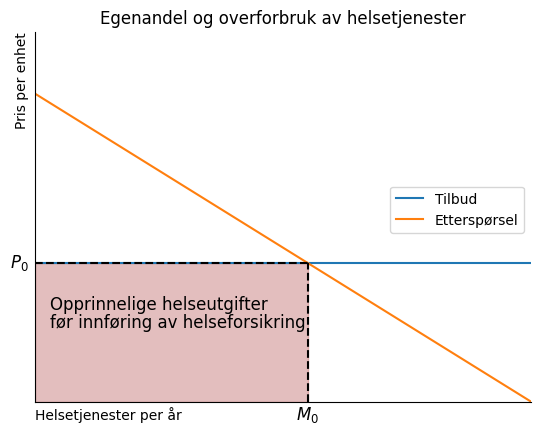

In [265]:

x_n = np.linspace(0.1, 500, 100)
q= np.linspace(0,x_eq,100)
def create_ax():
    fig, ax = plt.subplots()
    ax.set_ylabel('Pris per enhet', loc='top')
    ax.set_xlabel('Helsetjenester per år', loc='left')
    ax.set(xlim=(0, 200))
    ax.set(ylim=(0, 200))
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.set_xticks([])
    ax.set_yticks([])
    
    return fig, ax


fig, ax = create_ax()


ax.plot(x_n, [demand(x) for x in x_n], label='Tilbud')
ax.plot(x_n, [supply(x) for x in x_n], label='Etterspørsel')

# Draw lines for the new equilibrium
ax.vlines(x_eq, 0, p_eq, linestyles='dashed', color='black')
ax.hlines(p_eq, 0, x_eq, linestyles='dashed', color='black')

# Title
ax.set_title('Egenandel og overforbruk av helsetjenester')


q_adjusted = np.linspace(0, x_eq, 100)
# Filling the area below the vertical line (from y=0 to y=p_eq)
ax.fill_betweenx([0, p_eq], 0, x_eq, color='brown', alpha=0.3)

# Adding text for M_o at the 110-x axis
ax.text(x_eq, -10, '$M_0$', horizontalalignment='center', fontsize=12)
# Adding text for P_o at the y axis
ax.text(-10, p_eq, '$P_0$', verticalalignment='center', fontsize=12)

# Adding a text in the fill between area saying "Opprinnelige helseutgifter" før innføring av helseforsikring"ArithmeticError
ax.text(6, 50, 'Opprinnelige helseutgifter', fontsize=12)
ax.text(6, 40, 'før innføring av helseforsikring', fontsize=12)

# Show legend
ax.legend(bbox_to_anchor=(1, 0.6))

plt.show()

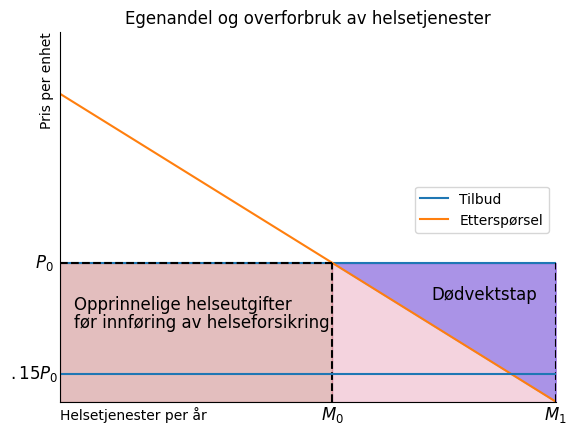

In [266]:
# New vline
ax.vlines(200, 0, p_eq, linestyles='dashed', color='black')

# Adding text for M_1 at the 110-x axis
ax.text(200, -10, '$M_1$', horizontalalignment='center', fontsize=12)

# Filling the deadweight loss area which is the area between the new vline and the supply curve but do not include the above area
ax.fill_betweenx([0, supply(x_eq)], x_eq, 200, color='palevioletred', alpha=0.3)

# Filling the deadweight loss area, which is the code I ended up taking from ChatGPT
x_values_for_fill = np.linspace(x_eq, 200, 100)
y_values_supply_for_fill = supply(x_values_for_fill)
ax.fill_between(x_values_for_fill, y_values_supply_for_fill, p_eq, color='blue', alpha=0.3, label='Deadweight Loss')

# Adding text for deadweight loss
ax.text(150, 55, 'Dødvektstap', fontsize=12)

# Making the new demand for a person with health insurance
demand_2 = lambda x: 15
ax.plot(x_n, [demand_2(x) for x in x_n], label='Tilbud med helseforsikring', color='#1f77b4')

# Adding text for the new P_1
ax.text(-20, 15, '$.15P_0$', verticalalignment='center', fontsize=12)
fig

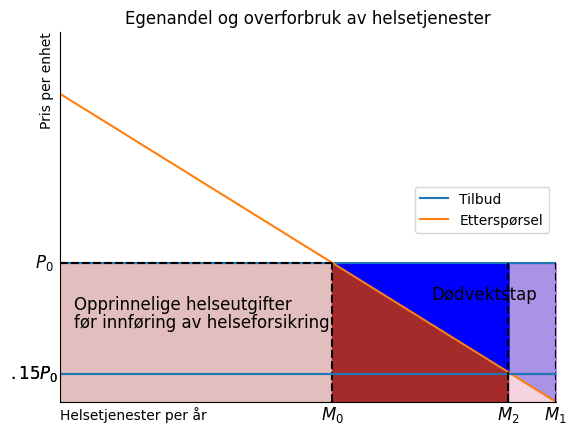

In [267]:
# Making the new demand for a person with health insurance
demand_2 = lambda x: 15
ax.plot(x_n, [demand_2(x) for x in x_n], label='Tilbud med helseforsikring', color='#1f77b4')

# Adding text for the new P_1
ax.text(-20, 15, '$.15P_0$', verticalalignment='center', fontsize=12)

# New vline at the new equilibrium
ax.vlines(181, 0, 75, linestyles='dashed', color='black')

# Adding text for M_2 at the 181-x axis
ax.text(181, -10, '$M_2$', horizontalalignment='center', fontsize=12)

# Fill_between the M_0 and M_2 up to p_0
ax.fill_betweenx([0, 75], 110, 181, color='brown', alpha=1)

# Fill_between the M_0 and M_2 up to p_0
x_values_for_fill_2 = np.linspace(x_eq, 181, 100)
y_values_supply_for_fill_2 = supply(x_values_for_fill_2)
ax.fill_between(x_values_for_fill_2, y_values_supply_for_fill_2, p_eq, color='blue', alpha=1, label='Deadweight Loss')

fig

In [268]:
x_eq

110.0